# Data
### what was the age of the youngest person
### what was the age of the oldest person
### wether body camera usage had gone up
### how many days had 0 unreported cases

In [1]:
#Importing modules and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import graphviz
from datetime import datetime

df = pd.read_csv("shootings.csv")
#dropping the name column
df = df.drop('name', 1)
df

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


### Oldest person shot

In [2]:

df.loc[df['age'].idxmax()]

id                                   2407
date                           2017-03-08
manner_of_death                      shot
armed                                 gun
age                                    91
gender                                  M
race                                White
city                       Union Township
state                                  PA
signs_of_mental_illness             False
threat_level                       attack
flee                          Not fleeing
body_camera                         False
arms_category                        Guns
Name: 2071, dtype: object

In [3]:
#youngest person shot
df.loc[df['age'].idxmin()]


id                                980
date                       2015-11-03
manner_of_death                  shot
armed                         unarmed
age                                 6
gender                              M
race                            White
city                       Marksville
state                              LA
signs_of_mental_illness         False
threat_level                    other
flee                              Car
body_camera                      True
arms_category                 Unarmed
Name: 811, dtype: object

### Comparing body camera usage over the years

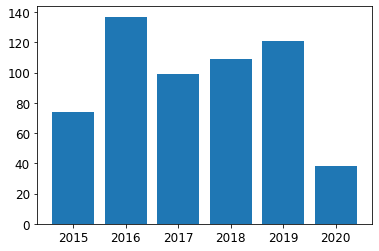

In [4]:

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

years = [2015, 2016, 2017, 2018, 2019, 2020]

cams_year = [0, 0, 0, 0, 0, 0]
cases_year = [0, 0, 0, 0, 0, 0]
ix = 0
for year in years:
    cams = 0
    cases = 0
    for ind in df.index:
        if ((df.year[ind] == year)):
            cases += 1
        if ((df.year[ind] == year) & (df.body_camera[ind] == True)):
            cams += 1
    cams_year[ix] = cams
    cases_year[ix] = cases
    ix += 1

plt.rcParams.update({'font.size': 12})    
yearly = plt.bar(years, cams_year)

plt.show()

We can see that the amount of bodycameras used since 2015 has gone up, the current year (2020)
should be ignored here as the latest data is from June 2020,
and given the pandemic it can't be used to compare with the other years.
let's compare this to the amount of cases in those years.

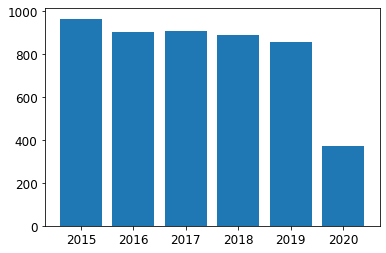

In [5]:
yearly_c = plt.bar(years, cases_year)
plt.show()

Comparing these, we can see that body camera usage has gone up, whilst the amount of reported cases has gone down.

### How many ways were there where nobody was shot?

In [6]:
months = sorted(df.month.unique())
days = sorted(df.day.unique())
days_wo_shootings = 0
dates = []
done = False
for year in years:
    if done:
        break
    for month in months:
        if done:
            break
        for day in days:
            date_s = str(year) 
            
            if month == 2 and day == 29:
                break
            elif (month == 4 or month == 6 or month == 9 or month == 11) and day == 31:
                break
            else:
                if month < 10:
                    date_s += '-0' + str(month)
                else:
                    date_s += '-' + str(month)
                if day < 10:
                    date_s += '-0' + str(day)
                else:
                    date_s += '-' + str(day)
                if date_s == '2020-06-16':
                    done = True
                    break
            
            dates.append(date_s)

In [7]:
df['date'] = df['date'].astype(str)
for ind in df.index:
    if df.date[ind] in dates:
        dates.remove(df.date[ind])
print(len(dates))

201


The total amount of days where there were no reported fatal shootings is 201,
this is between 2015-01-01 and 2020-06-15.